In [1]:
import pandas as pd
import numpy as np

#### 1

#### 2

#### 3

#### 4

#### Intro Linked List

A linked list is a data structure that is similar to an array. It also stores data in an ordered manner, but it is implemented using node objects (you will have a custom class that defines the node object). Each node will have a "next" pointer, which points to the node representing the next element in the sequence.

In [2]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
    
one = ListNode(1)
two = ListNode(2)
three = ListNode(3)
one.next = two
two.next = three
head = one

print(head.val)
print(head.next.val)
print(head.next.next.val)

1
2
3


The main advantage of a linked list is that you can add and remove elements at any position in O(1). The caveat is that you need to have a reference to a node at the position in which you want to perform the addition/removal, otherwise the operation is O(n), because you will need to iterate starting from the head until you get to the desired position. However, this is still much better than a normal (dynamic) array, which requires O(n) for adding and removing from an arbitrary position.

The main disadvantage of a linked list is that there is no random access. If you have a large linked list and want to access the 150,000th element, then there usually isn't a better way than to start at the head and iterate 150,000 times. So while an array has O(1) indexing, a linked list could require O(n) to access an element at a given position.

In [3]:
#insertion at i position
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def add_node(prev_node, node_to_add):
    node_to_add.next = prev_node.next #this inserts the node_to_add in the second last position
    prev_node.next = node_to_add

In [4]:
#Deletion at i position
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def delete_node(prev_node):
    prev_node.next = prev_node.next.next




As mentioned before, when you have a reference to the node at i - 1, then insertion and deletion is O(1). However, without that reference, you need to obtain the reference by iterating from the head, which for an arbitrary position is O(n).

Doubly linked list

A doubly linked list is like a singly linked list, but each node also contains a pointer to the previous node. This pointer is usually called prev, and it allows iteration in both directions.

In a singly linked list, we needed a reference to the node at i - 1 if we wanted to add or remove at i. This is because we needed to perform operations on the prevNode. With a doubly linked list, we only need a reference to the node at i. This is because we can simply reference the prev pointer of that node to get the node at i - 1, and then do the exact same operations as above.

With a doubly linked list, we need to do extra work to also update the prev pointers

In [5]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

# Let node be the node at position i
def add_node(node, node_to_add):
    prev_node = node.prev
    node_to_add.next = node
    node_to_add.prev = prev_node
    prev_node.next = node_to_add
    node.prev = node_to_add

# Let node be the node at position i
def delete_node(node):
    prev_node = node.prev
    next_node = node.next
    prev_node.next = next_node
    next_node.prev = prev_node

#### Linked lists with sentinel nodes



    We call the start of a linked list the head and the end of a linked list the tail.

Sentinel nodes sit at the start and end of linked lists and are used to make operations and the code needed to execute those operations cleaner. The idea is that, even when there are no nodes in a linked list, you still keep pointers to a head and tail. The real head of the linked list is head.next and the real tail is tail.prev. The sentinel nodes themselves are not part of our linked list.

In [1]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

def add_to_end(node_to_add):
    node_to_add.next = tail
    node_to_add.prev = tail.prev
    tail.prev.next = node_to_add
    tail.prev = node_to_add

def remove_from_end():
    if head.next == tail:
        return

    node_to_remove = tail.prev
    node_to_remove.prev.next = tail
    tail.prev = node_to_remove.prev

def add_to_start(node_to_add):
    node_to_add.prev = head
    node_to_add.next = head.next
    head.next.prev = node_to_add
    head.next = node_to_add

def remove_from_start():
    if head.next == tail:
        return
    
    node_to_remove = head.next
    node_to_remove.next.prev = head
    head.next = node_to_remove.next

head = ListNode(None)
tail = ListNode(None)
head.next = tail
tail.prev = head

#### Dummy pointers

As mentioned earlier, we usually want to keep a reference to the head to ensure we can always access any element. Sometimes, it's better to traverse using a "dummy" pointer and to keep head at the head.

In [2]:
def get_sum(head):
    ans = 0
    dummy = head
    while dummy:
        ans += dummy.val
        dummy = dummy.next
    
    # same as before, but we still have a pointer at the head
    return ans


#### Fast And Slow Pointers

Fast and slow pointers is an implementation of the two pointers technique that we learned in the arrays and strings chapter. The idea is to have two pointers that don't move side by side. This could mean they move at different "speeds" during iteration, begin iteration from different locations, or any other abstract difference.

When the pointers move at different speeds, usually the "fast" pointer moves two nodes per iteration, whereas the "slow" pointer moves one node per iteration (although this is not always the case). Here's some pseudocode:

In [ ]:
# // head is the head node of a linked list
# function fn(head):
#     slow = head
#     fast = head

#     while fast and fast.next:
#         Do something here
#         slow = slow.next
#         fast = fast.next.next

The reason we need the while condition to also check for fast.next is because if fast is at the final node, then fast.next is null, and trying to access fast.next.next would result in an error (you would be doing null.next).

##### Example 1



    Example 1: Given the head of a linked list with an odd number of nodes head, return the value of the node in the middle.

    For example, given a linked list that represents 1 -> 2 -> 3 -> 4 -> 5, return 3.


In [ ]:
# As mentioned in the previous article, the easiest way to solve this problem would be to just convert the linked list 
# into an array by iterating over it, and then just returning the number in the middle.

# function fn(head):
#     array = int[]
#     while head:
#         array.push(head.val)
#         head = head.next

#     return array[array.length // 2]


# This is basically "cheating", and would never pass as an acceptable solution in an interview. 
# You may have realized that the difficulty in this problem comes from the fact that we don't know how long the linked list is.
# One thing we could do is iterate through the linked list once with a dummy pointer to find the length, 
# then iterate from the head again once we know the length to find the middle.

In [7]:
def get_middle(head):
    length = 0
    dummy = head
    while dummy:
        length += 1
        dummy = dummy.next
    
    for _ in range(length // 2):
        head = head.next
    
    return head.val

The most elegant solution comes from using the fast and slow pointer technique. If we have one pointer moving twice as fast as the other, then by the time it reaches the end, the slow pointer will be halfway through since it is moving at half the speed.

In [8]:
def get_middle(head):
    slow = head
    fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    return slow.val

##### Example 2



    Example 2: 141. Linked List Cycle

    Given the head of a linked list, determine if the linked list has a cycle.

    There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer.


In [12]:
class Solution:
    def hasCycle(self, head) -> bool:
        slow = head
        fast = head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True

        return False

In [13]:
class Solution:
    def hasCycle(self, head) -> bool:
        seen = set()
        while head:
            if head in seen:
                return True
            seen.add(head)
            head = head.next
        return False

#####  Example 3



    Example 3: Given the head of a linked list and an integer k, return the kth node from the end.

    For example, given the linked list that represents 1 -> 2 -> 3 -> 4 -> 5 and k = 2, return the node with value 4, as it is the 2nd node from the end.


In [ ]:
#### without fast/slow pointers

length = 0
dummy = head
while dummy:
    length += 1
    dummy = dummy.next

for _ in range(length-k+1):
    head = head.next

return head.val

In [ ]:
#with 2 pointers
def find_node(head, k):
    slow = head
    fast = head
    for _ in range(k):
        fast = fast.next
    
    while fast:
        slow = slow.next
        fast = fast.next
    
    return slow

##### Middle of the Linked List

In [ ]:
# Given the head of a singly linked list, return the middle node of the linked list.

# If there are two middle nodes, return the second middle node.

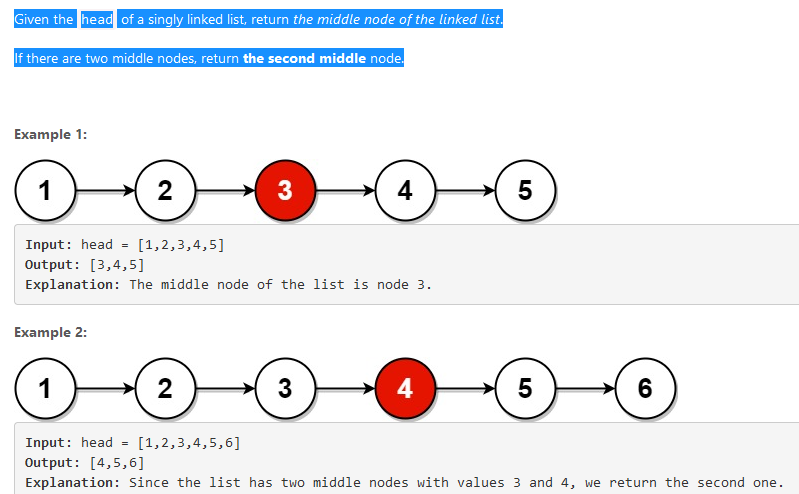

In [ ]:
class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        
        slow = head
        fast = head
        length = 0
        
        while fast:
            fast = fast.next
            length+=1
        
        for i in range(length//2 +1):
            slow = slow.next
        
        return slow
            
        
        

##### Remove Duplicates from Sorted List

Given the head of a sorted linked list, delete all duplicates such that each element appears only once. Return the linked list sorted as well.

In [ ]:
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        seen = set()
        prev = None
        curr = head
        while curr and curr.next:
            if curr in seen:
                prev.next = curr.next 
            seen.add(head)
            prev = head
            head = head.next
        return head

In [27]:
# [1,1,2,2,3]
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
    
one = ListNode(1)
two = ListNode(1)
three = ListNode(2)
four = ListNode(2)
five = ListNode(3)
one.next = two
two.next = three
three.next = four
four.next = five

head = one



def deleteDuplicates(head):
        
        seen = set()
        prev = None
        curr = head
        
        while curr and curr.next:
            if curr.val in seen:
#                 print(curr.val)
                prev.next = curr.next
                curr = curr.next 
            else:
                seen.add(curr.val)
                prev = curr
                curr = curr.next
        
        return head

head = deleteDuplicates(head)
head.next.val

2

#### Reversing a linked list

Imagine that we have a linked list 1 -> 2 -> 3 -> 4, and we want to return 4 -> 3 -> 2 -> 1. Let's say we keep a pointer curr that represents the current node we are at. Starting with curr at the 1, we need to get the 2 to point to curr. The problem is, once we iterate (curr = curr.next) to get to the 2, we no longer have a pointer to the 1 because it is a singly linked list. To get around this, we can use another pointer prev that tracks the previous node.

At any given node curr, we can set curr.next = prev to switch the direction of the arrow. Then, we can update prev to be curr in preparation for the next node. However, if we change curr.next, we will lose that next node. To fix this, we can use a temporary variable nextNode to point to the next node before changing any of the other pointers.

This exercise is a great one to practice operations on a linked list because it demonstrates the thought process needed. Solutions to linked list problems are usually simple and elegant - to get to them, think about what you need, and solve the problem one step at a time. In this example, we had the following thought process:

    When we are at a node curr, we need to set its next pointer to the node we were at previously.
        Use a prev pointer to track the previous node.
    The prev pointer needs to also update every iteration.
        After updating curr.next, set prev = curr in preparation for the next node.
    If we set curr.next = prev, then we lose the reference to the original curr.next.
        Use nextNode to keep a reference to the original curr.next.


In [ ]:
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        prev = None
        curr = head
        while curr:
            next_node = curr.next # first, make sure we don't lose the next node
            curr.next = prev      # reverse the direction of the pointer
            prev = curr           # set the current node to prev for the next node
            curr = next_node      # move on
            
        return prev

#### Swap Nodes in Pairs

Given the head of a linked list, swap every pair of nodes. For example, given a linked list 1 -> 2 -> 3 -> 4 -> 5 -> 6, return a linked list 2 -> 1 -> 4 -> 3 -> 6 -> 5.

In [ ]:
class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        # Check edge case: linked list has 0 or 1 nodes, just return
        if not head or not head.next:
            return head

        dummy = head.next               # Step 5
        prev = None                     # Initialize for step 3
        while head and head.next:
            if prev:
                prev.next = head.next   # Step 4
            prev = head                 # Step 3

            next_node = head.next.next  # Step 2
            head.next.next = head       # Step 1

            head.next = next_node       # Step 6
            head = next_node            # Move to next pair (Step 3)

        return dummy

#### Maximum twin sum of a linked list 

In [43]:
# https://leetcode.com/problems/maximum-twin-sum-of-a-linked-list/

In a linked list of size n, where n is even, the ith node (0-indexed) of the linked list is known as the twin of the (n-1-i)th node, if 0 <= i <= (n / 2) - 1.

For example, if n = 4, then node 0 is the twin of node 3, and node 1 is the twin of node 2. These are the only nodes with twins for n = 4.

The twin sum is defined as the sum of a node and its twin.

Given the head of a linked list with even length, return the maximum twin sum of the linked list.

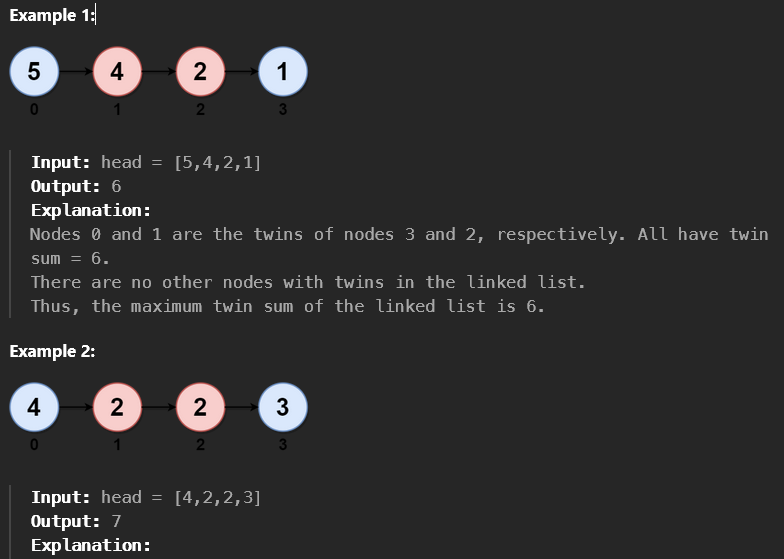

In [ ]:
def pairSum(self, head: Optional[ListNode]) -> int:
    
    

#### Reverse Linked List II

Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

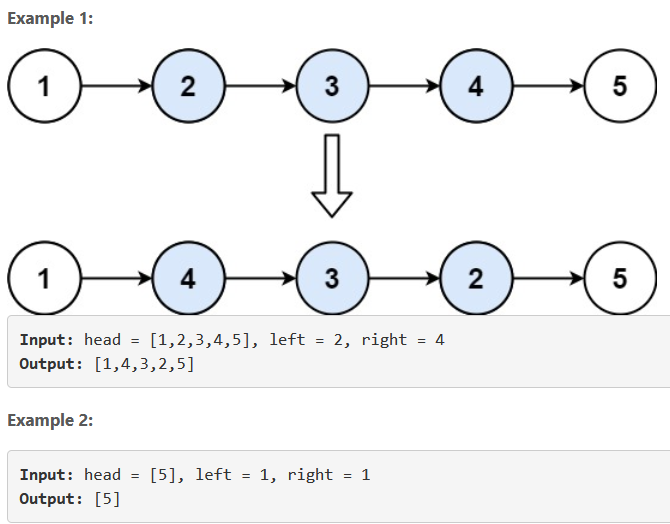

In [42]:
# [1,4,3,2,5]
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
    
one = ListNode(1)
two = ListNode(4)
three = ListNode(3)
four = ListNode(2)
five = ListNode(5)
one.next = two
two.next = three
three.next = four
four.next = five

head = one

left = 1
right = 3

class Solution:
    def reverseBetween(self, head, left: int, right: int):
        
        prev = None        
        curr = head1 = head
        
        cur_pos = 0
        
        while cur_pos <=left: #get the left node
            
            next_node = curr.next
            prev = curr  # at the end of this while , it will save left-1 node
            curr = next_node
            cur_pos +=1
            
            
        
        prev1 = None
        
        
        
        
        while cur_pos<=right:      
            
                
            next_node = curr.next # first, make sure we don't lose the next node
            curr.next = prev1      # reverse the direction of the pointer
            prev1 = curr           # set the current node to prev for the next node
            curr = next_node      # move on
            
            cur_pos += 1     
        
        
            
        
        curr.next = dummy.next
        
        prev.next = curr
        
        return curr
    
head1 = Solution().reverseBetween(head, left, right)
head1.val

NameError: name 'dummy' is not defined

In [ ]:
class Solution:
    def reverseBetween(
        self, head: Optional[ListNode], m: int, n: int
    ) -> Optional[ListNode]:
        # Empty list
        if not head:
            return None

        # Move the two pointers until they reach the proper starting point
        # in the list.
        cur, prev = head, None
        while m > 1:
            prev = cur
            cur = cur.next
            m, n = m - 1, n - 1

        # The two pointers that will fix the final connections.
        tail, con = cur, prev

        # Iteratively reverse the nodes until n becomes 0.
        while n:
            third = cur.next
            cur.next = prev
            prev = cur
            cur = third
            n -= 1

        # Adjust the final connections as explained in the algorithm
        if con:
            con.next = prev
        else:
            head = prev
        tail.next = cur
        return head